<a href="https://colab.research.google.com/github/zainabsuleman/LR-DT_Urldataset/blob/main/Zainab_URL_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd

In [42]:
!pip install wandb

In [43]:
import wandb
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [44]:
run = wandb.init(
    project="URL Dataset",
    # Track hyperparameters and run metadata
    config={
        "learning_rate": 0.01,
        "epochs": 10,
    },
)

accuracy,▁
accuracy,100.0


In [45]:
data = pd.read_csv('urlset.csv', encoding='latin-1')

<ipython-input-45-cacdd82e776b>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('urlset.csv', encoding='latin-1')


In [46]:
data.sample(20)

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
72315,tech.dimac.net/Products/w3Image/start.htm,703610,1,0,4,47.000000,43.250000,0.000000,0.000000,0.000000,0.000000,0.777778,0.70283,0.0
90486,botw.org/top/Games/Board_Games/Abstract/Battle...,8805,1,0,6,260.333333,268.000000,0.000637,0.001239,0.000638,0.001240,0.875000,0.845169,0.0
50994,users.rcn.com/wmhelpwm/architect/,27433,1,1,2,46.500000,41.500000,0.000000,0.000000,0.000000,0.000000,0.700000,0.64486,0.0
78597,incrtcl.sourceforge.net/iwidgets/,168,1,1,1,5.000000,3.000000,0.083333,0.090909,0.117647,0.133333,0.666667,0.333333,0.0
76619,www.inf.puc-rio.br/~roberto/book/,41801,1,0,3,138.333333,142.666667,0.000000,0.000000,0.000000,0.000000,0.750000,0.713415,0.0
75447,www.virtualmachinery.com/jhawkprod.htm,10000000,0,0,3,20.000000,14.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.609375,0.0
76228,www.c-point.com/javascript_editor.php,386218,0,0,3,260.666667,268.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.861665,0.0
51036,interiordec.about.com/od/tradepublications/,79,1,1,2,48.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.761062,0.663717,0.0
90931,www.gamereport.com/tgr5/tomjolly.html,10000000,1,0,4,101.750000,107.750000,0.000000,0.000000,0.000000,0.000000,0.800000,0.767932,0.0
65257,www.rntl.net/sausalitocam.htm,10000000,0,0,3,39.000000,34.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.641791,0.0


In [47]:
data.dropna(inplace=True)

In [48]:
crosstab = pd.crosstab([data['mld_res'],data['mld.ps_res'],data['card_rem'],data['ratio_Rrem'],data['ratio_Arem'],data['jaccard_RR'],data['jaccard_RA'],data['jaccard_AR'],data['jaccard_AA'],data['jaccard_ARrd'],data['jaccard_ARrem']],data['label'])
print(crosstab)

label                                                                                                                     0.0  \
mld_res mld.ps_res card_rem ratio_Rrem ratio_Arem jaccard_RR jaccard_RA jaccard_AR jaccard_AA jaccard_ARrd jaccard_ARrem        
0       0          0        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000     0.0             40   
                                                                                                           0               18   
                                                                                              0.500000     0                0   
                                                                                              0.666667     0                0   
                   1        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000     0.0            160   
...                                                                                              

In [49]:
from sklearn import tree

In [50]:
y = data['label']

In [51]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
95902    0.0
95903    0.0
95904    0.0
95905    0.0
95906    0.0
Name: label, Length: 95906, dtype: float64

In [52]:
X = data.drop(['domain', 'label'], axis=1)

In [53]:
X

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
0,10000000,1,0,18,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729
1,10000000,0,0,11,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577
2,10000000,0,0,14,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582
3,10000000,0,0,6,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.85964
4,10000000,0,0,8,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971
...,...,...,...,...,...,...,...,...,...,...,...,...
95902,11106,1,1,4,277.250000,289.250000,0.002681,0.003431,0.002691,0.003442,0.692308,0.802705
95903,339,1,1,2,152.000000,151.000000,0.002825,0.002841,0.000000,0.000000,0.450980,0.830816
95904,11812,1,1,2,47.000000,49.000000,0.017857,0.017241,0.000000,0.000000,0.550000,0.811321
95905,339,1,1,2,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906


In [54]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [55]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [56]:
X = X.apply(pd.to_numeric, errors='coerce').dropna()

In [57]:
clf = clf.fit(X,y)

In [58]:
import pydotplus

In [59]:
from IPython.display import Image

In [60]:
dot_data=tree.export_graphviz(clf, feature_names=X.columns,
                              class_names=['1', '0'],
                              filled=True, out_file=None)

In [61]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="ranking <= 5499815.0\\nentropy = 1.0\\nsamples = 95906\\nvalue = [48004, 47902]\\nclass = 1", fillcolor="#ffffff"] ;\n1 [label="card_rem <= 9.5\\nentropy = 0.727\\nsamples = 39842\\nvalue = [31762, 8080]\\nclass = 1", fillcolor="#eca16b"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="ratio_Rrem <= 0.25\\nentropy = 0.626\\nsamples = 37462\\nvalue = [31596, 5866]\\nclass = 1", fillcolor="#ea985e"] ;\n1 -> 2 ;\n3 [label="entropy = 0.895\\nsamples = 2322\\nvalue = [723, 1599]\\nclass = 0", fillcolor="#93c9f1"] ;\n2 -> 3 ;\n4 [label="entropy = 0.533\\nsamples = 35140\\nvalue = [30873, 4267]\\nclass = 1", fillcolor="#e99254"] ;\n2 -> 4 ;\n5 [label="card_rem <= 13.5\\nentropy = 0.365\\nsamples = 2380\\nvalue = [166, 2214]\\nclass = 0", fillcolor="#48a4e7"] ;\n1 -> 5 ;\n6 [label="entropy = 0.773\\nsamples = 696\\nvalue = [158, 538]\\nc

In [62]:
graph = pydotplus.graph_from_dot_data(dot_data)

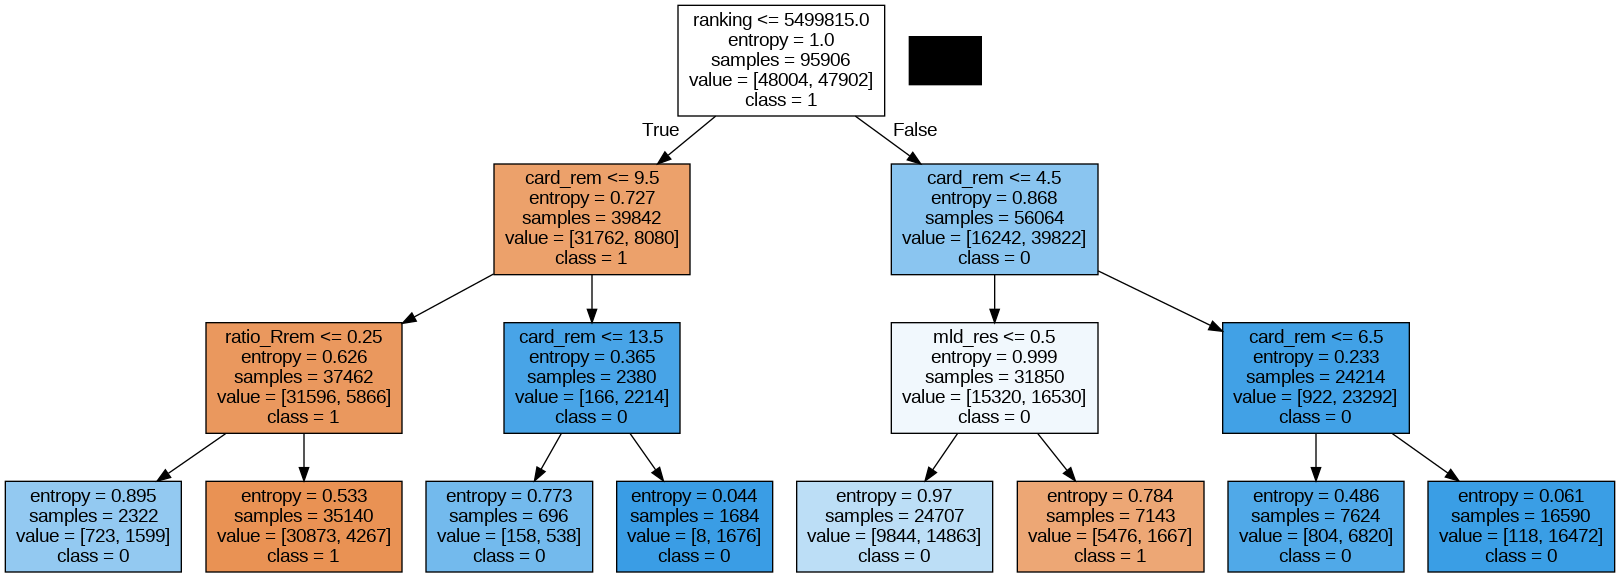

In [63]:
graph
Image(graph.create_png())

In [64]:
testData = [['xbox360.gamespy.com/xbox-360/dead-space/',11812,1,1,3,114,128.333333,0.019718,0.020151,0.011461,0.012788,0.55,0.714623,0],
            ['xbox360.ign.com/objects/850/850402.html',339,1,1,2,142.5,141,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0],
            ['games.teamxbox.com/xbox-360/1860/Dead-Space/',63029,1,0,3,114,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623,0],
            ['www.gamespot.com/xbox360/action/deadspace/',753,1,1,3,91,101.333333,0,0.003106,0,0,0.111111,0.648571,0],
            ['en.wikipedia.org/wiki/Dead_Space_(video_game)',6,1,1,4,682,744.25,0.033075,0.029412,0.03025,0.029145,0.809735,0.840323,0],
            ['www.angelfire.com/goth/devilmaycrytonite/',2547,1,1,5,32.4,27.2,0.022222,0.03268,0.017341,0.020408,0.636364,0.674157,0],
          ]

In [65]:
testData

[['xbox360.gamespy.com/xbox-360/dead-space/',
  11812,
  1,
  1,
  3,
  114,
  128.333333,
  0.019718,
  0.020151,
  0.011461,
  0.012788,
  0.55,
  0.714623,
  0],
 ['xbox360.ign.com/objects/850/850402.html',
  339,
  1,
  1,
  2,
  142.5,
  141,
  0.009009,
  0.009091,
  0.006536,
  0.006601,
  0.45098,
  0.846906,
  0],
 ['games.teamxbox.com/xbox-360/1860/Dead-Space/',
  63029,
  1,
  0,
  3,
  114,
  128.333333,
  0.002899,
  0.002577,
  0.002907,
  0.002584,
  0.75,
  0.714623,
  0],
 ['www.gamespot.com/xbox360/action/deadspace/',
  753,
  1,
  1,
  3,
  91,
  101.333333,
  0,
  0.003106,
  0,
  0,
  0.111111,
  0.648571,
  0],
 ['en.wikipedia.org/wiki/Dead_Space_(video_game)',
  6,
  1,
  1,
  4,
  682,
  744.25,
  0.033075,
  0.029412,
  0.03025,
  0.029145,
  0.809735,
  0.840323,
  0],
 ['www.angelfire.com/goth/devilmaycrytonite/',
  2547,
  1,
  1,
  5,
  32.4,
  27.2,
  0.022222,
  0.03268,
  0.017341,
  0.020408,
  0.636364,
  0.674157,
  0]]

In [66]:
data.columns

Index(['domain', 'ranking', 'mld_res', 'mld.ps_res', 'card_rem', 'ratio_Rrem',
       'ratio_Arem', 'jaccard_RR', 'jaccard_RA', 'jaccard_AR', 'jaccard_AA',
       'jaccard_ARrd', 'jaccard_ARrem', 'label'],
      dtype='object')

In [67]:
testData = pd.DataFrame(testData, columns=data.columns)

In [68]:
testY = testData['label']

In [69]:
testY

0    0
1    0
2    0
3    0
4    0
5    0
Name: label, dtype: int64

In [70]:
testX = testData.drop(['domain', 'label'], axis=1)

In [71]:
testX

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
0,11812,1,1,3,114.0,128.333333,0.019718,0.020151,0.011461,0.012788,0.550000,0.714623
1,339,1,1,2,142.5,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906
2,63029,1,0,3,114.0,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623
3,753,1,1,3,91.0,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571
4,6,1,1,4,682.0,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323
5,2547,1,1,5,32.4,27.200000,0.022222,0.032680,0.017341,0.020408,0.636364,0.674157


In [72]:
predY = clf.predict(testX)

In [73]:
predY

array([0., 0., 0., 0., 0., 0.])

In [74]:
testY

0    0
1    0
2    0
3    0
4    0
5    0
Name: label, dtype: int64

In [75]:
predictions = pd.concat([testData['domain'], testData['label'], pd.Series(predY, name="Predicted Class")], axis=1)

In [76]:
predictions

,domain,label,Predicted Class
0,xbox360.gamespy.com/xbox-360/dead-space/,0,0.0
1,xbox360.ign.com/objects/850/850402.html,0,0.0
2,games.teamxbox.com/xbox-360/1860/Dead-Space/,0,0.0
3,www.gamespot.com/xbox360/action/deadspace/,0,0.0
4,en.wikipedia.org/wiki/Dead_Space_(video_game),0,0.0
5,www.angelfire.com/goth/devilmaycrytonite/,0,0.0


In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(testY, predY)

1.0

In [79]:
print("Accuracy on test data is %.2f" % (accuracy_score(testY, predY)*100))

Accuracy on test data is 100.00


In [80]:
wandb.log({"accuracy": accuracy_score(testY, predY)*100})